## Exploratory Data Analysis

In [30]:
#EDA
import sklearn as sk
import numpy as np
import pandas as pd
import os
from pathlib import Path
import seaborn as sns


In [45]:
Path(os.getcwd()).parent

WindowsPath('c:/Users/asus/Documents/Projects/california_housing_prediction')

In [46]:
df_raw=pd.read_csv(Path(os.getcwd()).parent/'data/raw/housing_raw_data.csv')
df_raw.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [48]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Observation:

* No missing values
* All feature datatypes are in float
* The `medInc` which means median income seems to have been scaled down.(8 actually would mean 80,000 USD)
* Same goes for the `target` which means the price column.

<Axes: >

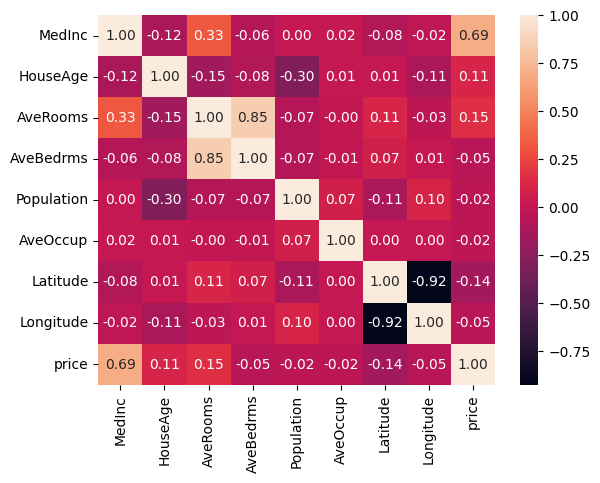

In [49]:
sns.heatmap(df_raw.corr(method='pearson'),annot=True,fmt=".2f")

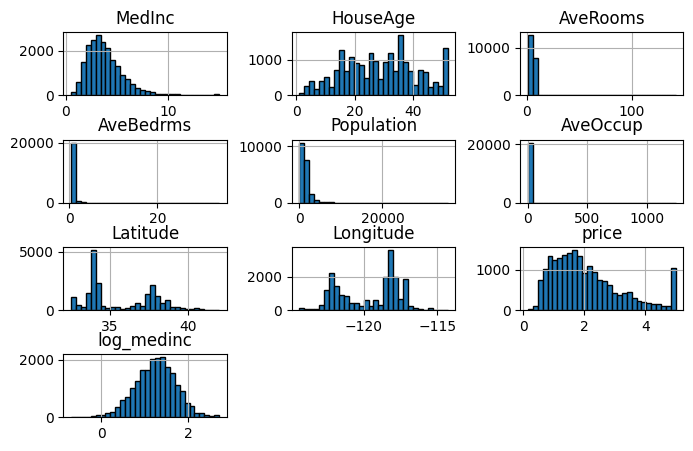

In [50]:
import matplotlib.pyplot as plt
df_raw['log_medinc']=np.log(df_raw['MedInc'])
df_raw.hist(figsize=(8, 5), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: xlabel='Longitude', ylabel='Latitude'>

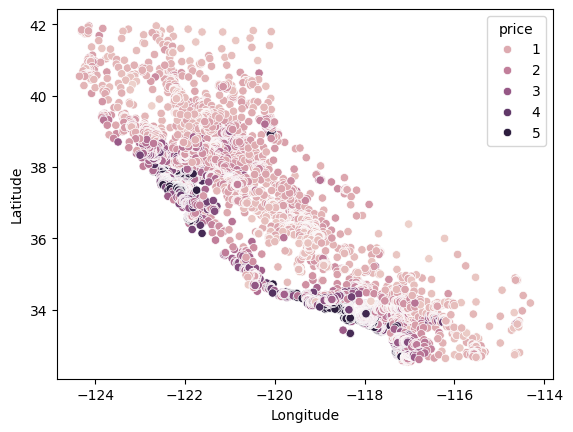

In [41]:
sns.scatterplot(x=df['Longitude'],y=df['Latitude'],hue=df['price'])

#### Observation:
* Here we observe that blocks that are near sea-shore and bay area are higher in price.
* The blocks far away from those area's are bit cheaper

In [ ]:
df_raw['HouseAge'].value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

In [59]:
df_raw['Population_Rounded'] = (df_raw['Population'] / 10).apply(np.floor) * 100
df_raw['Population_Rounded']

0         3200.0
1        24000.0
2         4900.0
3         5500.0
4         5600.0
          ...   
20635     8400.0
20636     3500.0
20637    10000.0
20638     7400.0
20639    13800.0
Name: Population_Rounded, Length: 20640, dtype: float64

In [56]:
df_raw['Population'].value_counts()

Population
891.0     25
1052.0    24
761.0     24
850.0     24
1227.0    24
          ..
3700.0     1
5558.0     1
6437.0     1
6242.0     1
5534.0     1
Name: count, Length: 3888, dtype: int64

### Data PreProcessing

In [ ]:
#This is a simple preprocessing we'll do in our data

def pre_process(df):
    df['MedInc']=np.log(df['MedInc'])
    return df
    